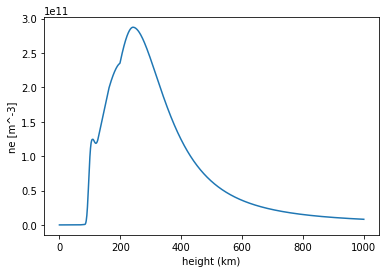

In [8]:
import numpy as np
import pylab as plt

from pyiri2016 import IRI2016Profile
from time import gmtime, mktime, strptime

'''Derivations in ionotomo.notebooks'''
def a_priori_model(heights,lat,lon,
                   year=None,month=None,day=None,time=None):
    hmax = np.max(heights)
    if time is not None:
        try:
            t = gmtime(mktime(strptime(time.isot, "%Y-%m-%dT%H:%M:%S.%f") ))
        except:
            t = gmtime(mktime(strptime(time, "%Y-%m-%dT%H:%M:%S.%f") ))
        year, month, day = t.tm_year,t.tm_mon,t.tm_mday
    iri = IRI2016Profile(altlim=[1.,hmax],altstp=1., lat=lat, lon=lon, year=year, month=month, dom = day, option = 1, verbose=False)
    ne = iri.a[0,:]
    ne[ne == -1] = np.min(ne[ne!=-1])
    h = np.linspace(1.,hmax,len(ne))
    ne_out = np.interp(heights,h,ne)
    return ne_out


def a_priori_model_(h,zenith,thin_f=False):
    '''Return a stratified reference ionosphere electron density based on 
    fitted data depending on zenith angle of the sun in degrees.    
    `h` : `numpy.ndarray` 
        heights above Earths surface in km    
    `zenith` : `float`
        zenith angle of sun in degrees'''

    def peak_density(n0,dn,tau,b,zenith):
        y = zenith/tau
        return n0 + dn*np.exp(-y**2)/(1. + y**(2*b))
    def peak_height(z0,dz,rho,chi0,zenith):
        return z0 + dz/(1.+np.exp(-(zenith - chi0)/rho))
    def layer_density(nm,zm,H,z):
        y = (z - zm)/H
        return nm*np.exp(1./2. * (1. - y - np.exp(-y)))
        
    #D layer
    #nm_d = peak_density(4e8,5.9e8,58.,1300.,zenith)
    y = zenith/58.
    if y < 1:
        nm_d = 4e8 + 5.9e8*np.exp(-y**2)
    else:
        nm_d = 4e8
    zm_d = peak_height(81.,7.,7.46,100.,zenith)
    H_d = 8.
    n_d = layer_density(nm_d,zm_d,H_d,h)
    #E layer
    nm_e = peak_density(1.6e9,1.6e11,87.,8.7,zenith)
    zm_e = 110.
    H_e = 11.
    n_e = layer_density(nm_e,zm_e,H_e,h)
    #F1 layer
    nm_f1 = peak_density(2.0e11,9.1e10,54.,13.6,zenith)
    zm_f1 = 185.
    H_f1 = 40.
    if thin_f:
        H_f1 /= 2.
    n_f1 = layer_density(nm_f1,zm_f1,H_f1,h)
    #F2 layer
    nm_f2 = peak_density(7.7e10,4.4e11,111.,4.8,zenith)
    zm_f2 = peak_height(242.,75.,7.46,96.,zenith)
    H_f2 = 55.
    if thin_f:
        H_f2 /= 2.
    n_f2 = layer_density(nm_f2,zm_f2,H_f2,h)

    n = np.atleast_1d(n_d + n_e + n_f1 + n_f2)
    return n

lon=5.
lat=52.
time = "2018-04-27T06:30:00.000"
heights = np.linspace(0,1000,1000)


ne = a_priori_model(heights,lat,lon,time)
plt.plot(heights, ne)    
plt.xlabel('height (km)')
plt.ylabel('ne [m^-3]')
# plt.yscale('log')
plt.show()

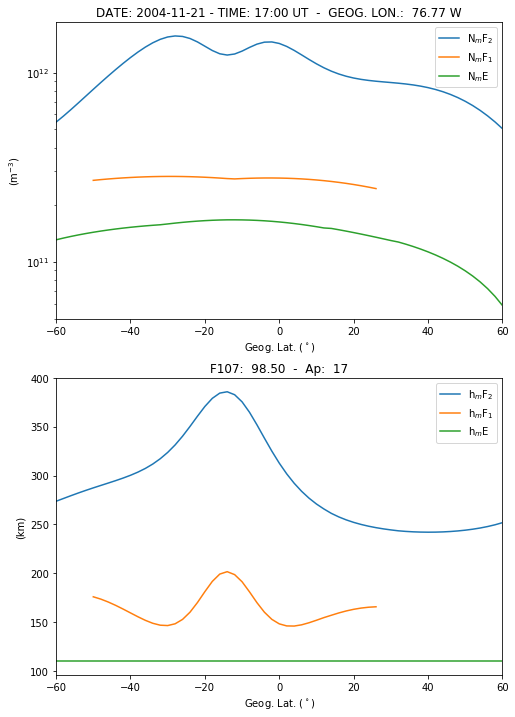

In [9]:
from pyiri2016 import IRI2016,IRI2016Profile
from numpy import arange
from matplotlib.pyplot import figure, legend, show
import seaborn

def example02():

    """ Geog. Latitude Profile Example """

    latlim = [-60, 60]
    latstp = 2.
    iri2016Obj = IRI2016Profile(alt=600, hour=17., latlim=latlim, latstp=latstp, \
    lon=-76.77, option=2, verbose=False, year=2004)

    latbins = arange(latlim[0], latlim[1] + latstp, latstp)

    nlat = len(latbins)
    index = range(nlat)

    fig = figure(figsize=(8,12))

    pn = fig.add_subplot(211)        
    NmF2 = iri2016Obj.b[0, index]
    NmF1 = IRI2016()._RmNeg(iri2016Obj.b[2, index])
    NmE = iri2016Obj.b[4, index]        
    pn.plot(latbins, NmF2, label='N$_m$F$_2$')
    pn.plot(latbins, NmF1, label='N$_m$F$_1$')
    pn.plot(latbins, NmE, label='N$_m$E')        
    pn.set_title(iri2016Obj.title1)
    pn.set_xlim(latbins[[0, -1]])
    pn.set_xlabel('Geog. Lat. ($^\circ$)')
    pn.set_ylabel('(m$^{-3}$)')        
    pn.set_yscale('log')
    legend(loc='best')

    pn = fig.add_subplot(212)
    hmF2 = iri2016Obj.b[1, index]
    hmF1 = IRI2016()._RmNeg(iri2016Obj.b[3, index])
    hmE = iri2016Obj.b[5, index]        
    pn.plot(latbins, hmF2, label='h$_m$F$_2$')
    pn.plot(latbins, hmF1, label='h$_m$F$_1$')
    pn.plot(latbins, hmE, label='h$_m$E')        
    pn.set_xlim(latbins[[0, -1]])
    pn.set_title(iri2016Obj.title2)
    pn.set_xlabel('Geog. Lat. ($^\circ$)')
    pn.set_ylabel('(km)')
    legend(loc='best')                

if __name__ == '__main__':

    example02()

    show()